In [30]:
import pandas as pd
import numpy as np
import openpyxl
import matplotlib.pyplot as plt

# Estudio estadístico sobre la hipertensión

La **hipertensión** es una enfermedad que se encuentra muy presente en las preocupaciones actuales en el mundo de la sanidad. Aproximadamente, un 30% de la población adulta padece hipertensión arterial, es decir, arpoximadamente uno de cada tres. En términos clínicos, se considera hipertensión cuando la presión arterial sistólica (la “alta”) es igual o superior a 140 mmHg, y/o la presión arterial diastólica (la “baja”) es igual o superior a 90 mmHg, medidas en reposo y en varias ocasiones distintas. 

Esta enfermedad es una de las principales causas de padecer una enfermedad cardiovascular. Por este motivo, se está llevando a cabo una búsqueda para encontrar la manera de frenar este suceso.

En un laboratorio europeo se está trabajando en un medicamento innovador con cierta composición de etanol para reducir la presión arterial alta (sistólica). Para provar la efectividad de este medicamento, se provará en una muestra aleatoria (de una población donde todo individuo patece hipertensión) de 100 personas de diferentes edades. Para poder observar mejor las características de este estudio, nos resultará interesante dividir la muestra en dos subgrupos. El grupo 1, formado por pacientes con edad igual o inferior a 35 años, y el grupo 2, pacientes con edad superior a 35 años.

### Vamos a leer los datos y a guardarlos en un data frame (df)

In [5]:
data=pd.read_excel("HIPERTENSION.xlsx", engine='openpyxl')  # Este comando nos lee el excel y lo guarda en un df
data.head() #Este comando nos enseña las 5 primeras filas del df

,Grupo,Edad,Presion sistólica antes,Presión sistólica después,Colesterol total
0,1,30,126,118,191
1,1,25,114,110,181
2,1,27,110,110,175
3,1,34,108,105,173
4,1,35,131,132,200


Podemos observar que el data frame está compuesto por 5 variables. La primera, "Grupo" nos dice si el paciente forma parte del grupo 1 o del grupo 2, dependiendo de su edad. La segunda variable, "Edad", nos informa de la edad de cada paciente. La tercera y cuarta variables corresponden al valor de la presión sintólica antes y después de tomar la dosis. Finalmente, la variable "Colesterol total", que nos indica la cantidad de colesterol en sangre que tiene cada paciente.

# Ahora guardaremos los dos subgrupos en dos df diferentes

In [27]:
grupo_1=data[data['Grupo']==1] #Filtramos por el el valor de la variable "Grupo" para que tengan el valor 1
grupo_2=data[data['Grupo']==2] #Filtramos por el el valor de la variable "Grupo" para que tengan el valor 2
print(f'El grupo 1 consta de {len(grupo_1)} individuos y el grupo 2 de {len(grupo_2)} individuos.')

El grupo 1 consta de 40 individuos y el grupo 2 de 60 individuos.


Una vez tenemos estos dos grupos diferenciados, nos puede resultar interesante calcular sus medidas de centralización y de dispersión:

In [25]:
print("Las medidas de centralización de la variable 'Presión sistólica antes' son las siguientes:")
print(f" -La media de esta variable para el grupo 1 es {round(grupo_1['Presion sistólica antes'].mean(),3)} y para el grupo 2 es {round(grupo_2['Presion sistólica antes'].mean(),3)}.")
print(f" -La mediana de esta variable para el grupo 1 es {round(grupo_1['Presion sistólica antes'].median(),3)} y para el grupo 2 es {round(grupo_2['Presion sistólica antes'].median(),3)}.")
print(f" -La moda de esta variable para el grupo 1 es {round(grupo_1['Presion sistólica antes'].mode()[0],3)}, la tienen {len(grupo_1[grupo_1['Presion sistólica antes']==121])} individuos. Para el grupo 2 es {round(grupo_2['Presion sistólica antes'].mode()[0],3)}, la tienen {len(grupo_2[grupo_2['Presion sistólica antes']==121])} individuos.")
##############
print("Las medidas de dispersión de la variable 'Presión sistólica antes' son las siguientes:")
print(f" -La varianza de esta variable para el grupo 1 es {round(grupo_1['Presion sistólica antes'].var(),3)} y para el grupo 2 es {round(grupo_2['Presion sistólica antes'].var(),3)}.")
print(f" -La desviación típica de esta variable para el grupo 1 es {round(grupo_1['Presion sistólica antes'].std(),3)} y para el grupo 2 es {round(grupo_2['Presion sistólica antes'].std(),3)}.")
print(f" -El rango de esta variable para el grupo 1 es {round(grupo_1['Presion sistólica antes'].max() - grupo_1['Presion sistólica antes'].min(),3)} y para el grupo 2 es {round(grupo_2['Presion sistólica antes'].max() - grupo_2['Presion sistólica antes'].min(),3)}.")

Las medidas de centralización de la variable 'Presión sistólica antes' son las siguientes:
 -La media de esta variable para el grupo 1 es 123.425 y para el grupo 2 es 127.483.
 -La mediana de esta variable para el grupo 1 es 124.5 y para el grupo 2 es 126.0.
 -La moda de esta variable para el grupo 1 es 121, la tienen 3 individuos. Para el grupo 2 es 121, la tienen 7 individuos.
Las medidas de dispersión de la variable 'Presión sistólica antes' son las siguientes:
 -La varianza de esta variable para el grupo 1 es 81.481 y para el grupo 2 es 192.898.
 -La desviación típica de esta variable para el grupo 1 es 9.027 y para el grupo 2 es 13.889.
 -El rango de esta variable para el grupo 1 es 37 y para el grupo 2 es 58.


Aquí podemos observar que el grupo 1 esta centrados en un punto un poco más bajo que el grupo 2 (la media son 4 puntos menos en el grupo 1 que en el grupo 2, y la mediana 1.5). Aunque la moda en ambos grupos es la misma, en el grupo 1 aparece 3 veces y en el grupo 2, 7 veces (cierto es también que el grupo 2 está formado por 20 pacientes más que el grupo 1).

Donde si observamos un cambio más significativo es cuando hablamos de como se dispersan los datos. Podemos observar que la varianza en el grupo 2 es más del doble que la varianza en el grupo 1. También observamos que el rango de valores en el grupo 2 es más amplio que en el grupo 1. 

Para observar esto último, lo veremos más claro con un gráfico de dispersión.

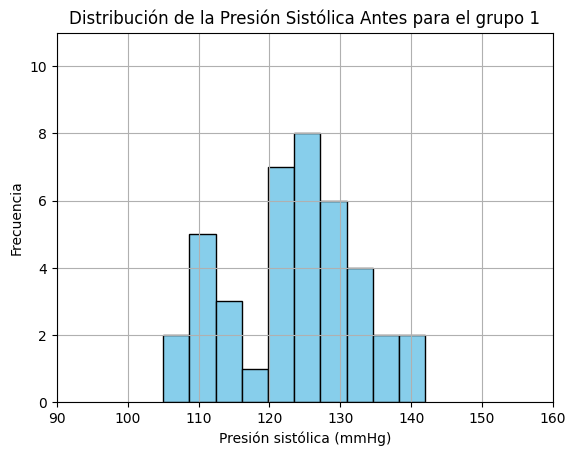

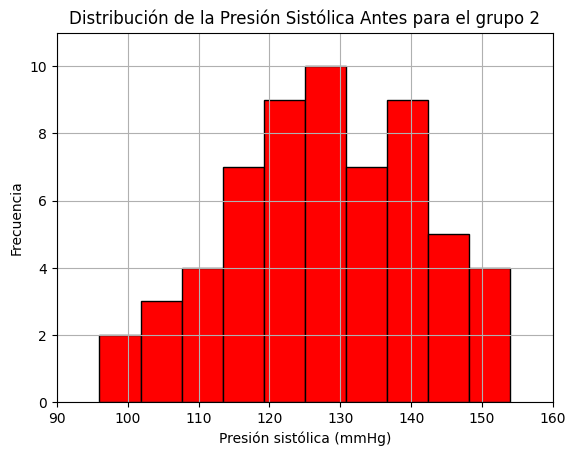

In [38]:
#Histograma para el grupo 1
plt.hist(grupo_1["Presion sistólica antes"], bins=10, color='skyblue', edgecolor='black')
plt.xlim(90, 160) #Adjudicaremos el mismo rango de valores para el eje X y eje Y
plt.ylim(0,11)
plt.title("Distribución de la Presión Sistólica Antes para el grupo 1")
plt.xlabel("Presión sistólica (mmHg)")
plt.ylabel("Frecuencia")
plt.grid(True)
plt.show()
#Histograma para el grupo 2
plt.hist(grupo_2["Presion sistólica antes"], bins=10, color='red', edgecolor='black')
plt.xlim(90, 160)
plt.ylim(0,11)
plt.title("Distribución de la Presión Sistólica Antes para el grupo 2")
plt.xlabel("Presión sistólica (mmHg)")
plt.ylabel("Frecuencia")
plt.grid(True)
plt.show()

Aquí podemos observar que la presión sistólica, antes de tomar el medicamento, está distribuida de manera más amplia en el grupo 2 que en el grupo 1. Esto es un buen indicio de por qué hemos separado los datos en dos grupos: permite mejorar la calidad del análisis y obtener conclusiones más detalladas.

OJO: En el histograma del grupo 2, las frecuencias son más altas que en el histograma del grupo 1. Esto es debido a que el grupo 2 esá compuesto por 20 pacientes más que el grupo 1.

#### Coeficiente de variación ($CV$)

Para ver si la media de ambos gruos es representativa, calcularemos el coeficiente de variación, $CV=\frac{s}{\bar{x}}$, de ambos grupos. Si este es menor de $0.3$, podemos considerar que la media es representativa.

In [18]:
print(f"El coeficiente de variación para de la variable 'Presión sistólica antes' del grupo 1 es {round(grupo_1['Presion sistólica antes'].std()/grupo_1['Presion sistólica antes'].mean(),3)}")
print(f"El coeficiente de variación para de la variable 'Presión sistólica antes' del grupo 2 es {round(grupo_2['Presion sistólica antes'].std()/grupo_2['Presion sistólica antes'].mean(),3)}")

El coeficiente de variación para de la variable 'Presión sistólica antes' del grupo 1 es 0.073
El coeficiente de variación para de la variable 'Presión sistólica antes' del grupo 2 es 0.109


Cuando menor sea $\lvert CV \rvert$, más representativa será la media. Diremos que si $\lvert CV \rvert \in (0,0.1)$, tendremos muy buena representatividad; la media refleja muy bien los datos. Si $\lvert CV \rvert \in [0.1,0.2]$ tendremos una representatividad aceptable; la media es útil con precaución. En cambio, si $\lvert CV \rvert \in (0.2,\infty)$ tenemos una representatividad baja; la media puede no reflejar adecuadamente los datos.

En nuestro ejercicio, la media del grupo 1 resulta muy representativa, mientras que la del grupo 2 también es bastante representativa, aunque ligeramente menos que la del grupo 1.